In [1]:
%matplotlib inline
from NIRS import NIRS
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from time import sleep

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Create a NIRS instance.
nirs = NIRS()

# Disable sleep mode.
nirs.set_hibernate(False)

0

In [16]:
# Test error clear.
# Set an unsupported PGA gain value.
nirs.set_pga_gain(3)
nirs.scan() # Expecting an error.

In [17]:
# Clear errors.
nirs.clear_error_status()
nirs.set_lamp_on_off(0) # Reset lamp.

In [18]:
# Set PGA gain.
nirs.set_pga_gain(64)

In [19]:
# # Scan for SNR (not tested yet).
# snr_list = nirs.scan_snr()
# print(snr_list)

In [20]:
# Perform a normal scan. 
nirs.scan()
result = nirs.get_scan_results()

In [21]:
result["pga"]

64

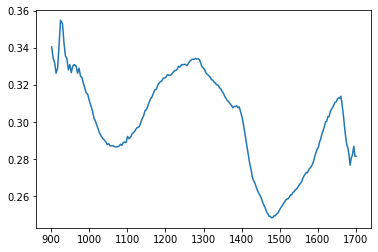

In [4]:
# Plot.
reflectance = np.array(result["intensity"]) / np.array(result["reference"])
plt.plot(result["wavelength"], reflectance)
plt.show()

In [5]:
# Keep lamp on, then scan.
nirs.set_lamp_on_off(1)
sleep(1)
nirs.scan()
sleep(1)
result = nirs.get_scan_results()

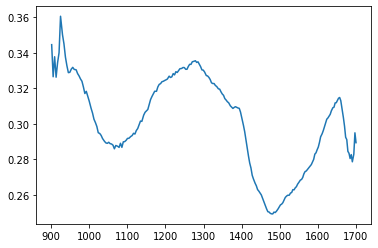

In [6]:
# Plot.
reflectance = np.array(result["intensity"]) / np.array(result["reference"])
plt.plot(result["wavelength"], reflectance)
plt.show()

In [7]:
# Keep lamp off, then scan.
# Note: there is high possibility to encounter a scan error because of no signal detected (or some low-level bugs?).

# nirs.set_lamp_on_off(0)
nirs.set_lamp_on_off(-1)
sleep(1)
nirs.scan()
sleep(1)

result = nirs.get_scan_results()

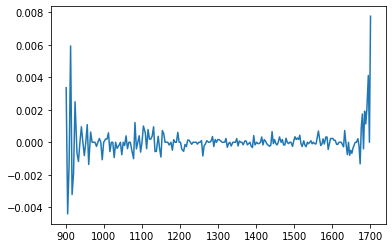

In [8]:
# Plot.
reflectance = np.array(result["intensity"]) / np.array(result["reference"])
plt.plot(result["wavelength"], reflectance)
plt.show()